In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [5]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [6]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(df_market_data[['price_change_percentage_24h',
                                                                    'price_change_percentage_7d',
                                                                    'price_change_percentage_14d',
                                                                    'price_change_percentage_30d',
                                                                    'price_change_percentage_60d',
                                                                    'price_change_percentage_200d',
                                                                    'price_change_percentage_1y']])
market_data_scaled

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [49]:
# Create a DataFrame with the scaled data
market_data_scaled_df = pd.DataFrame(market_data_scaled, columns = ['price_change_percentage_24h',
                                                                    'price_change_percentage_7d',
                                                                    'price_change_percentage_14d',
                                                                    'price_change_percentage_30d',
                                                                    'price_change_percentage_60d',
                                                                    'price_change_percentage_200d',
                                                                    'price_change_percentage_1y'])


# Copy the crypto names from the original data
market_data_scaled_df["coin_id"] = df_market_data.index

# Set the coinid column as index
market_data_scaled_df = market_data_scaled_df.set_index('coin_id')

# Display sample data
market_data_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [9]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))

In [10]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `market_data_scaled_df`
# 3. Append the model.inertia_ to the inertia list

for each_k in k:
    model = KMeans(n_clusters=each_k)
    model.fit(market_data_scaled_df)
    inertia.append(model.inertia_)

inertia

C:\Users\nmrod\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nmrod\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nmrod\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nmrod\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

[287.0,
 195.82021818036046,
 123.19048183836959,
 79.02243535120975,
 63.85866780584265,
 53.05778846567062,
 43.468904596598925,
 37.19292816115659,
 32.61795723204129,
 28.02496469676394]

In [11]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_data_df = pd.DataFrame(elbow_data)
elbow_data_df

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,63.858668
5,6,53.057788
6,7,43.468905
7,8,37.192928
8,9,32.617957
9,10,28.024965


In [128]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_curve_original_trans_data = elbow_data_df.hvplot.line(x="k", 
                          y="inertia", 
                          title="Elbow Curve", 
                          xticks=k)

elbow_curve_original_trans_data

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for 'k' using the PCA data seems to be 4. The notch at 4 is a little more prominent then 3 which gives me more confidence that 4 clusters is the most opitmal amount of clusters for the market data. 


---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [72]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [73]:
# Fit the K-Means model using the scaled data
model.fit(market_data_scaled_df)

C:\Users\nmrod\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nmrod\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [74]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = model.predict(market_data_scaled_df)

# Print the resulting array of cluster values.
print(crypto_clusters)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 1 0 2 2 3
 2 2 2 2]


In [75]:
# Create a copy of the DataFrame
prediction_df = market_data_scaled_df.copy()

In [76]:
# Add a new column to the DataFrame with the predicted clusters
prediction_df['crypto_clusters'] = crypto_clusters

# Display sample data
prediction_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [130]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

original_trans_data_clusters = prediction_df.hvplot(kind = 'scatter',
                    x = 'price_change_percentage_24h',
                    y = 'price_change_percentage_7d',
                    by = 'crypto_clusters',
                    hover_cols = 'coin_id')

original_trans_data_clusters

:NdOverlay   [crypto_clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [39]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [40]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
crypto_pca = pca.fit_transform(market_data_scaled_df)

# View the first five rows of the DataFrame. 
crypto_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [47]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
print(pca.explained_variance_ratio_)

# Printing out the calculation of the total variance/"information" that is kept for PCA1, PCA2, & PCA3
print(pca.explained_variance_ratio_.sum()*100)

[0.3719856  0.34700813 0.17603793]
89.5031657030984


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.503% of the total explain variance/"information" is kept after applying PCA to the orignal transformed dataset

In [82]:
# Create a new DataFrame with the PCA data.
crypto_pca_df = pd.DataFrame(crypto_pca, columns=["PC1", "PC2", "PC3"])

# Copy the crypto names from the original data
crypto_pca_df['coin_id'] = df_market_data.index

# Set the coinid column as index
crypto_pca_df = crypto_pca_df.set_index('coin_id')

# Display sample data
crypto_pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [83]:
# Create a list with the number of k-values from 1 to 11
pca_k = list(range(1,11))

In [84]:
# Create an empty list to store the inertia values
pca_inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `crypto_pca_df`
# 3. Append the pca_model.inertia_ to the inertia list

for each_pca_k in pca_k:
    pca_model = KMeans(n_clusters=each_pca_k)
    pca_model.fit(crypto_pca_df)
    pca_inertia.append(pca_model.inertia_)

pca_inertia

C:\Users\nmrod\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nmrod\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nmrod\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nmrod\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

[256.87408556789256,
 168.81189630685225,
 93.77462568057294,
 49.66549665179736,
 38.072792150143194,
 27.618971787957427,
 21.163977911774445,
 17.01696214007742,
 13.668324883664052,
 10.559357562793432]

In [109]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    "k": pca_k,
    "inertia": pca_inertia
}
# Create a DataFrame with the data to plot the Elbow curve
elbow_pca_df = pd.DataFrame(elbow_data_pca)
elbow_pca_df.head()

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,93.774626
3,4,49.665497
4,5,38.072792


In [129]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_curve_pca_data = elbow_pca_df.hvplot.line(x="k", 
                         y="inertia", 
                         title="Elbow Curve Using PCA Data", 
                         xticks=k)

elbow_curve_pca_data

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for 'k' using the PCA data seems to be 4. The notch at 4 is a little more prominent then 3 which gives me more confidence that 4 clusters is the most opitmal amount of clusters for the PCA data. 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, based on the elbow curve, the best 'k' value for the optimal amount of clusters for original market data and the PCA data seem to be 4 clusters.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [103]:
# Initialize the K-Means model using the best value for k
pca_model = KMeans(n_clusters=4)

In [104]:
# Fit the K-Means model using the PCA data
pca_model.fit(crypto_pca_df)

C:\Users\nmrod\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nmrod\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [105]:
# Predict the clusters to group the cryptocurrencies using the PCA data
crypto_clusters = pca_model.predict(crypto_pca_df)

# Print the resulting array of cluster values.
print(crypto_clusters)

[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 1 3 0 0 2
 0 0 0 0]


In [106]:
# Create a copy of the DataFrame with the PCA data
pca_predictions_df = crypto_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_predictions_df['crypto_clusters'] = crypto_clusters

# Display sample data
pca_predictions_df.head()

,PC1,PC2,PC3,crypto_clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,3
ethereum,-0.458261,0.458466,0.952877,3
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,3


In [131]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

pca_data_clusters = pca_predictions_df.hvplot(kind = 'scatter',
                    x = 'PC1',
                    y = 'PC2',
                    by = 'crypto_clusters',
                    hover_cols = 'coin_id')

pca_data_clusters

:NdOverlay   [crypto_clusters]
   :Scatter   [PC1]   (PC2,coin_id)

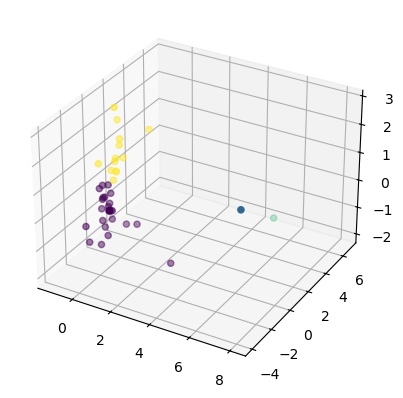

In [108]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pca_predictions_df['PC1'],
           pca_predictions_df['PC2'],
           pca_predictions_df['PC3'],
           c = pca_predictions_df['crypto_clusters']
          )

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [139]:
# Composite plot to contrast the Elbow curves
elbow_plots = elbow_curve_original_trans_data + elbow_curve_pca_data

# Displaying both elbow curve plots
display(elbow_plots)

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [138]:
# Composite plot to contrast the clusters
cluster_plots = original_trans_data_clusters + pca_data_clusters

# Displaying both cluster plots
display(cluster_plots)

:Layout
   .NdOverlay.I  :NdOverlay   [crypto_clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [crypto_clusters]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 